# visualizing linear regression

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

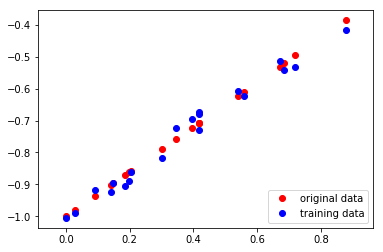

In [3]:
np.random.seed(1)
def f(x, a, b):
    n = train_x.size
    vals = np.zeros((1, n))
    for i in range(0, n):
        ax = np.multiply(a, x.item(i))
        val = np.add(ax, b)
        vals[0, i] = val 
    return vals

wref = 0.7
bref = -1
n = 20
noise_var = 0.001
train_x = np.random.random((1, n))
ref_y = f(train_x, wref, bref)
train_y = ref_y + np.sqrt(noise_var)*np.random.randn(1, n)
n_samples = train_x.size

# plot 
plt.figure(1)
plt.plot(train_x[0, :], ref_y[0, :], 'ro', label='original data')
plt.plot(train_x[0, :], train_y[0, :], 'bo', label='training data')
plt.axis('equal')
plt.legend(loc='lower right')

In [13]:
# parameters
training_epochs = 1000
display_step = 100

# set tensorflow graph
x = tf.placeholder("float")
y = tf.placeholder("float")
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

# construct a model
pred = tf.add(tf.multiply(x, w), b)

# define error measure and optimizer
learning_rate = 0.01
loss = tf.reduce_mean(tf.pow(pred - y, 2))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# initilizer
init = tf.global_variables_initializer()


# run
sess = tf.Session()
sess.run(init)

# summary
summary_writer = tf.summary.FileWriter('/tmp/tf_logs/linear_regression', graph=sess.graph)
for epoch in range(training_epochs):
    for (_x, _y) in zip(train_x[0, :], train_y[0, :]):
        sess.run(optimizer, feed_dict={x: _x, y: _y})
        
    # checkout
    if epoch %display_step == 0:
        loss_value = sess.run(loss, feed_dict={x: train_x, y: train_y})
        wtemp = sess.run(w)
        btemp = sess.run(b)
        print("[%03d / %03d]  loss: %.3f  " "wtemp is: %.3f  " "btemp is: %.3f" 
              %(epoch, training_epochs, loss_value, wtemp, btemp))
# final w and b
wopt = sess.run(w)
bopt = sess.run(b)
fopt = f(train_x, wopt, bopt)

[000 / 1000]  loss: 0.832  wtemp is: -0.031  btemp is: 0.160
[100 / 1000]  loss: 0.002  wtemp is: 0.563  btemp is: -0.951
[200 / 1000]  loss: 0.001  wtemp is: 0.675  btemp is: -0.994
[300 / 1000]  loss: 0.001  wtemp is: 0.689  btemp is: -1.000
[400 / 1000]  loss: 0.001  wtemp is: 0.690  btemp is: -1.001
[500 / 1000]  loss: 0.001  wtemp is: 0.690  btemp is: -1.001
[600 / 1000]  loss: 0.001  wtemp is: 0.691  btemp is: -1.001
[700 / 1000]  loss: 0.001  wtemp is: 0.691  btemp is: -1.001
[800 / 1000]  loss: 0.001  wtemp is: 0.691  btemp is: -1.001
[900 / 1000]  loss: 0.001  wtemp is: 0.691  btemp is: -1.001


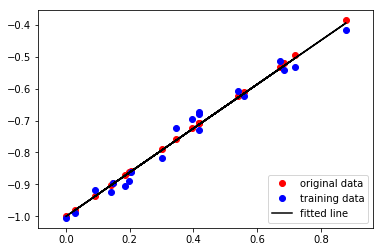

In [14]:
# plot result
plt.figure(2)
plt.plot(train_x[0, :], ref_y[0, :], 'ro', label='original data')
plt.plot(train_x[0, :], train_y[0, :], 'bo', label='training data')
plt.plot(train_x[0, :], fopt[0, :], 'k-', label='fitted line')
plt.axis('equal')
plt.legend(loc='lower right')

## run the command line

In [16]:
tensorboard --logdir=/tmp/tf_logs/linear_regression

SyntaxError: invalid syntax (<ipython-input-16-5489cac21dc3>, line 1)

## Open http://localhost:6006/ into your web browser